In [1]:
import numpy as np
import math
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

The basis functions of $V_0^{1,3}$ and their derivatives.

In [2]:
def phi(i,y):
    if i==0 and xx[0]<=y and y <=xx[1]: ##omega1 = x0,x1
        return 1/h**2*(y-xx[i+1])**2*(1-2/h*(xx[i]-y))
    elif i ==n and xx[n-1]<=y and y<=xx[n]: ##omegan = x(n-1),xn
        return 1/h**2*(y-xx[i-1])**2*(1+2/h*(xx[i]-y))
    elif i <=0 or i>=n:
        return 0.0
    else:
        if xx[i-1]<=y and y <= xx[i]: ##omegai
            return 1/h**2*(y-xx[i-1])**2*(1+2/h*(xx[i]-y))
        elif xx[i]<y and y<=xx[i+1]: ## omegai+1
            return 1/h**2*(y-xx[i+1])**2*(1-2/h*(xx[i]-y))
        else:
            return 0.0
    return 0.0
def psi(i,y):
    if i==0 and xx[0]<=y and y <=xx[1]: ##omega1 = x0,x1
        return 1/h**2*(y-xx[i+1])**2*(y-xx[i])
    elif i == n and xx[n-1]<=y and y<=xx[n]: ##omegan = x(n-1),xn
        return 1/h**2*(y-xx[i-1])**2*(y-xx[i])
    elif i <=0 or i>=n:
        return 0.0
    else:
        if xx[i-1]<=y and y <= xx[i]: ##omegai
            return 1/h**2*(y-xx[i-1])**2*(y-xx[i])
        elif xx[i]<y and y<=xx[i+1]: ## omegai+1
            return 1/h**2*(y-xx[i+1])**2*(y-xx[i])
        else:
            return 0.0
    return 0.0

In [3]:
#space derivative
def phiA(i,y):
    if i==0 and xx[0]<=y and y <=xx[1]: ##omega1 = x0,x1
        return 2/h**2*(y-xx[i+1])*(1-2/h*(xx[i]-y)) + 1/h**2*(y-xx[i+1])**2*2/h
    elif i ==n and xx[n-1]<=y and y<=xx[n]: ##omegan = x(n-1),xn
        return 2/h**2*(y-xx[i-1])*(1+2/h*(xx[i]-y)) - 2/h**3 *(y-xx[i-1])**2
    elif i <=0 or i>=n:
        return 0.0
    else:
        if xx[i-1]<=y and y <= xx[i]: ##omegai
            return 2/h**2*(y-xx[i-1])*(1+2/h*(xx[i]-y)) - 2/h**3*(y-xx[i-1])**2
        elif xx[i]<y and y<=xx[i+1]: ## omegai+1
            return 2/h**2*(y-xx[i+1])*(1-2/h*(xx[i]-y)) + 2/h**3*(y-xx[i+1])**2
        else:
            return 0.0
    return 0.0
def psiA(i,y):
    if i==0 and xx[0]<=y and y <=xx[1]: ##omega1 = x0,x1
        return 2.0/h**2*(y-xx[i+1])*(y-xx[i]) + 1/h**2*(y-xx[i+1])**2
    elif i == n and xx[n-1]<=y and y<=xx[n]: ##omegan = x(n-1),xn
        return 2.0/h**2*(y-xx[i-1])*(y-xx[i]) + 1/h**2*(y-xx[i-1])**2
    elif i <=0 or i>=n:
        return 0.0
    else:
        if xx[i-1]<=y and y <= xx[i]: ##omegai
            return 2.0/h**2*(y-xx[i-1])*(y-xx[i]) +1/h**2*(y-xx[i-1])**2
        elif xx[i]<y and y<=xx[i+1]: ## omegai+1
            return 2.0/h**2*(y-xx[i+1])*(y-xx[i]) + 1/h**2*(y-xx[i+1])**2
        else:
            return 0.0
    return 0.0

In [4]:
#second space derivative
def phi2A(i,y): 
    if i==0 and xx[0]<=y and y <=xx[1]:
        return 1/h**2*(2*(1-2/h*(xx[i]-y))+ 2*2*(y-xx[i+1])*2/h)
    elif i ==n and xx[n-1]<=y and y<=xx[n]: 
        return 1/h**2* (2*(1+2/h*(xx[i]-y))- 2*2*(y-xx[i-1])*2/h)
    elif i <=0 or i>=n:
        return 0.0
    else:
        if xx[i-1]<=y and y <= xx[i]: 
            return 1/h**2*(2*(1+2/h*(xx[i]-y))- 2*2*(y-xx[i-1])*2/h)
        elif xx[i]<=y and y<=xx[i+1]: 
            return 1/h**2*(2*(1-2/h*(xx[i]-y))+ 2*2*(y-xx[i+1])*2/h)
        else:
            return 0.0
    return 0.0
def psi2A(i,y):
    if i==0 and xx[0]<=y and y <=xx[1]:
        return 1/h**2* (2*(y-xx[i]) + 2*2*(y-xx[i+1])*1)
    elif i == n and xx[n-1]<=y and y<=xx[n]:
        return 1/h**2* (2*(y-xx[i])+2*2*(y-xx[i-1])*1)
    elif i <=0 or i>=n:
        return 0.0
    else:
        if xx[i-1]<=y and y <= xx[i]:
            return 1/h**2* (2*(y-xx[i])+2*2*(y-xx[i-1])*1)
        elif xx[i]<y and y<=xx[i+1]:
            return 1/h**2* (2*(y-xx[i]) + 2*2*(y-xx[i+1])*1)
        else:
            return 0.0
    return 0.0

Mollifiers.

In [5]:
S1 = 0.561541934473828555
def rho(x, eps):
    r = x**2/eps**2
    if  r < 1:
        return np.exp(-1/(1-r)) /eps /S1
    else:
        return 0.0
def rho2A(x,eps):
    r = x**2/eps**2
    if r<1:
        return S1*2*eps**2*(x**4-eps**4)*np.exp(-1/(1-r))/(x**2-eps**2)**4
    else:
        return 0
    
S2 = 0.69742385555651
def rho2d(x,y,eps):
    r = (x**2 + y**2)/eps**2
    if  r < 1:
        return np.exp(-1/(1-r)) /eps**2 /S2
    else:
        return 0.0

def rho2A2d(x,t,eps):
    r = (x**2+t**2)/eps**2
    if r <1:
        return S2*2*(3*x**4 + 2*t**2*x**2-t**4+2*eps**2*t**2-eps**4)*np.exp(-1/(1-r))/eps**6/r**4
    else:
        return 0

Assembling the solution $u(x,t)$ from the coefficient solution $u[i,j]$.

In [6]:
#Hermite interpolation operator $\Pi_h$.
def HermiteCoef(func, funcA):
    return np.concatenate([[func(y) for y in xx], [funcA(y) for y in xx]])
#function from coefficients solution u[i,j].
def w(x,t,u):
    j0 = int(math.floor(t/dt))
    w1 = 1-(t-tt[j0])/dt
    w2 = 1-w1
    if j0>=m-1:
        return sum([w1*u[i,j0]*phi(i,x) for i in range(n+1)])+sum([w1*u[i+n+1,j0]*psi(i,x) for i in range(n+1)])
    else:
        return sum([(w1*u[i,j0] + w2*u[i,j0+1])*phi(i,x) for i in range(n+1)])+sum([(w1*u[i+n+1,j0] + w2*u[i+n+1,j0+1])*psi(i,x) for i in range(n+1)])
#space derivative
def wA(x,t,u):
    j0 = int(math.floor(t/dt))
    w1 = 1-(t-tt[j0])/dt
    w2 = 1-w1
    if j0>=m-1:
        return sum([w1*u[i,j0] for i in range(n+1)])+sum([w1*u[i+n+1,j0]*psiA(i,x) for i in range(n+1)])
    else:
        return sum([(w1*u[i,j0] + w2*u[i,j0+1])*phiA(i,x) for i in range(n+1)])+sum([(w1*u[i+n+1,j0] + w2*u[i+n+1,j0+1])*psiA(i,x) for i in range(n+1)])
    return 
#second space derivative
def w2A(x,t,u):
    j0 = int(math.floor(t/dt))
    w1 = 1-(t-tt[j0])/dt
    w2 = 1-w1 
    if j0>=m-1:
        return sum([w1*u[i,j0]*phi2A(i,x) for i in range(n+1)])+sum([w1*u[i+n+1,j0]*psi2A(i,x) for i in range(n+1)])
    else:
        return sum([(w1*u[i,j0] + w2*u[i,j0+1])*phi2A(i,x) for i in range(n+1)])+sum([(w1*u[i+n+1,j0] + w2*u[i+n+1,j0+1])*psi2A(i,x) for i in range(n+1)])
#time derivative in terms of finite element coefficients
def dudt(u):
    ut = np.zeros((2*n+2, m))
    ut[:,0] = HermiteCoef(f2,f2A)
    ut[:,1:m-1] = [[(u[i,j+1]-u[i,j-1])/dt/2 for j in range(1,m-1)] for i in range(2*n+2)]
    ut[:,-1] = [(u[i,-1]-u[i,-2])/dt for i in range(2*n+2)]
    return ut

Plots

In [7]:
#Rainbow plot
def plot1(u,label=''):
    xfine = np.linspace(0.,L,200, endpoint = True)
    fig = plt.figure(figsize=(18.5,10.5))
    axes = fig.add_axes([0,0,1,1])
    colors = cm.rainbow(np.linspace(0,0.8, m))
    for j in range(0,m,12):
        axes.plot(xfine,[w(z,tt[j],u) for z in xfine],color = colors[j] ,lw=2)
    axes.set_xlabel('$x$')
    plt.show()

In [8]:
#Intersection plot
def plot2(u,label = ''):
    fig = plt.figure(figsize=(18.5,10.5))
    axes = fig.add_axes([0,0,1,1])
    plt.plot(tt,[w(0.5,t,u) for t in tt], label =label)
    axes.set_xlabel('$t$', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.legend(prop={'size':25})
    return fig

In [9]:
#intersection difference plot
def plot3(u,sol,label = ''):
    fig = plt.figure(figsize=(18.5,10.5))
    axes = fig.add_axes([0,0,1,1])
    plt.plot(tt,[sol(0.5,t)-w(0.5,t,u) for t in tt], label = label)
    axes.set_xlabel('$t$')
    plt.legend()
    return fig

In [10]:
#3d plot
def plot4(u,label = ''):
    X,Y = np.meshgrid(xx,tt)
    U = np.zeros((m, n+1))
    for j in range(m):
        U[j,:] = [w(xi,tt[j],u) for xi in xx]
    fig = plt.figure(figsize=(18.5,10.5))
    ax = fig.add_subplot(111, projection='3d')
    mycmap = plt.get_cmap('Blues')

    # Plot a 3D surface
    ax.view_init(30, -60)
    surf = ax.plot_surface(X, Y, U, cmap = mycmap, label = label)
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(prop={'size':25})
    ax.set_xlabel('$x$', size=20)
    ax.set_ylabel('$t$', size = 20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.zaxis.set_tick_params(labelsize = 20)
    return fig

In [11]:
#3d difference plot
def plot5(u,usol, label=''):
    X,Y = np.meshgrid(xx,tt)
    U = np.zeros((m, n+1))
    for j in range(m):
        U[j,:] = [w(x,tt[j],u)-usol(x,tt[j]) for x in xx]
    fig = plt.figure(figsize=(18.5,10.5))
    ax = fig.add_subplot(111, projection='3d')
    mycmap = plt.get_cmap('Blues')

    # Plot a 3D surface
    ax.view_init(30, -60)
    surf = ax.plot_surface(X, Y, U, cmap = mycmap, label =label)
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(prop={'size':25})
    ax.set_xlabel('$x$', size=20)
    ax.set_ylabel('$t$', size = 20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.zaxis.set_tick_params(labelsize = 20)
    return fig

Errors and norms

In [12]:
def normL2(f):
    return math.sqrt(integrate.quad(lambda y: f(y)**2, a = 0, b = 1, limit = 1000)[0])
def errorNormL2(t, u, usol):
    return normL2(lambda y: (w(y,t,u) - usol(y,t)))
def errorLinftyL2(u,usol):
    return np.max([errorNormL2(t,u, usol) for t in tt])

In [13]:
def normH1(f, fA):
    return math.sqrt(integrate.quad(lambda y: f(y)**2 + fA(y)**2, a = 0, b = 1, limit = 1000)[0])
def errorNormH1(t,u,usol, usolA):
    return normH1(lambda y: (w(y,t,u) - usol(y,t)), lambda y: wA(y,t,u) - usolA(y,t))
def errorLinftyH1(u,usol, usolA):
    return np.max([errorNormH1(t,u, usol, usolA) for t in tt])

In [14]:
def normH2(f,fA,f2A):
    return math.sqrt(integrate.quad(lambda y: f(y)**2 + fA(y)**2 + f2A(y)**2, a = 0, b = 1, limit = 1000)[0])
def errorNormH2(t, u, usol, usolA, usol2A):
    return normH2(lambda y: (w(y,t,u) - usol(y,t)), lambda y: wA(y,t,u) - usolA(y,t), lambda y: w2A(y,t,u)-usol2A(y,t))
def errorLinftyH2(u,usol, usolA, usol2A):
    return np.max([errorNormH2(t,u, usol, usolA, usol2A) for t in tt])

In [15]:
def errorW(u, usol, usolA, usol2A,usolt):
    ut = dudt(u)
    return np.max([math.sqrt(errorNormH2(t,u,usol, usolA, usol2A)**2 + errorNormL2(t,ut,usolt)**2)  for t in tt])

In [16]:
def errorH1L2t(u, usol, usolA, usolt):
    ut = dudt(u)
    return np.max([math.sqrt(errorNormH1(t,u,usol, usolA)**2 + errorNormL2(t,ut,usolt)**2)  for t in tt])

Construction of matrix coefficients for finite element solution. 

In [17]:
def constructA():
    A = np.zeros((2*n+2,2*n+2))
    for i in range(1,n):
        for j in [i-1,i,i+1]:
            if 1<=j<=n-1:
                A[i,j] = integrate.quad(lambda y : phi(i,y)*phi(j,y),(i-1)*h,(i+1)*h, limit = limit)[0]
                A[i,j+n+1] = integrate.quad(lambda y : phi(i,y)*psi(j,y),(i-1)*h,(i+1)*h, limit = limit)[0]
                A[i+n+1,j] = integrate.quad(lambda y : psi(i,y)*phi(j,y),(i-1)*h,(i+1)*h, limit = limit)[0]
                A[i+n,j+n+1] = integrate.quad(lambda y : psi(i,y)*psi(j,y),(i-1)*h,(i+1)*h, limit = limit)[0]
    return A

In [18]:
def constructB(bFunction,t):
    BMatrix = np.zeros((2*n+2,2*n+2))
    for i in range(1,n):
        points = [(i-1)*h, i*h, (i+1)*h]
        for j in [i-1,i,i+1]:
            if 1<=j<=n-1:
                BMatrix[i,j] = integrate.quad(lambda y : bFunction(y,t) * phi2A(j,y) * phi(i,y),(i-1)*h,(i+1)*h, points = points, limit = limit)[0]
                BMatrix[i,j+n+1] = integrate.quad(lambda y : bFunction(y,t)*psi2A(j,y) * phi(i,y), (i-1)*h,(i+1)*h, points= points, limit = limit)[0]
                BMatrix[i+n+1,j] = integrate.quad(lambda y : bFunction(y,t)*phi2A(j,y) * psi(i,y), (i-1)*h,(i+1)*h, points = points, limit = limit)[0]
                BMatrix[i+n+1,j+n+1] = integrate.quad(lambda y : bFunction(y,t)*psi2A(j,y) * psi(i,y), (i-1)*h,(i+1)*h, points = points, limit = limit)[0]
    return BMatrix

In [19]:
def constructC(cFunction):
    CMatrix = np.zeros((2*n+2,2*n+2))
    for i in range(1,n):
        points = [(i-1)*h, i*h, (i+1)*h]
        for j in [i-1,i,i+1]:
            if 1<=j<=n-1:
                CMatrix[i,j] = integrate.quad(lambda y : cFunction(y) * phi2A(j,y)* phi2A(i,y),(i-1)*h,(i+1)*h, points = points,limit = limit)[0]
                CMatrix[i,j+n+1] =  integrate.quad(lambda y : cFunction(y) *psi2A(j,y) * phi2A(i,y),(i-1)*h,(i+1)*h, points = points, limit = limit)[0]
                CMatrix[i+n+1,j] = integrate.quad(lambda y : cFunction(y) *phi2A(j,y)*psi2A(i,y),(i-1)*h,(i+1)*h, points = points,limit = limit)[0]
                CMatrix[i+n+1,j+n+1] = integrate.quad(lambda y : cFunction(y) *psi2A(j,y)*psi2A(i,y),(i-1)*h,(i+1)*h, points = points, limit = limit)[0]
    return CMatrix

In [20]:
def constructG(gFunction,t):
    GMatrix = np.zeros(2*n+2)
    for i in range(1,n):
        GMatrix[i] = integrate.quad(lambda y: gFunction(y,t)*phi(i,y),(i-1)*h,(i+1)*h, limit = limit)[0]
        GMatrix[i+n+1] = integrate.quad(lambda y: gFunction(y,t)*psi(i,y),(i-1)*h,(i+1)*h, limit = limit)[0]
    return GMatrix

In [21]:
#returns numerical solution, given currently defined data functions in environment
def solveFEM():
    u = np.zeros((2*n+2, m))
    u[:,0] = HermiteCoef(f1, f1A)
    rhs0 = dt**2 * G(dt) + np.dot(A, u[:,0] + dt*HermiteCoef(f2, f2A))
    massMatrix = A + dt**2 *(B(dt) + C)
    massMatrix[0,0] = 1
    massMatrix[n,n] = 1
    massMatrix[n+1,n+1] = 1
    massMatrix[2*n+1,2*n+1] = 1
    u[:,1] = np.linalg.solve(massMatrix, rhs0)
    for j in range(2,m):
        t_j = j*dt
        rhs =  dt**2 * G(t_j) + np.dot(A, 2*u[:,j-1] - u[:,j-2])
        massMatrix = A + dt**2 * (B(t_j) + C)
        massMatrix[0,0] = 1
        massMatrix[n,n] = 1
        massMatrix[n+1,n+1] = 1
        massMatrix[2*n+1,2*n+1] = 1
        u[:,j] = np.linalg.solve(massMatrix, rhs)
    return u

Experiment 1: $g(x,t)  =\delta(t-t_0)$.

In [22]:
def f1(x):
    return 0
def f1A(x):
    return 0
def f2(x):
    return 0
def f2A(x):
    return 0

L = 1.0
Lt =1
limit = 1000
n = 128
h=L/n
xx = np.linspace(0,L,n+1)
m = 256
tt = np.linspace(0,Lt, m)
dt= Lt/(m-1)

A = constructA()

t0 = 0.2

def G(t):
    GMatrix = np.zeros(2*n+2)
    gconstant = rho(t-t0,eps)
    for i in range(1,n+1):
        points = [(i-1)*h,i*h,(i+1)*h]
        GMatrix[i] = integrate.quad(lambda y: gconstant*phi(i,y),(i-1)*h,(i+1)*h,points = points, limit = limit)[0]
        GMatrix[i+n+1] = integrate.quad(lambda y: gconstant,(i-1)*h,(i+1)*h,points = points ,limit = limit)[0]
    return GMatrix

def b(x,t):
    return 1
BMatrix = constructB(b,0)
def B(t):
    return BMatrix

def c(x):
    return 1
C = constructC(c)

epsilons = [0.2,0.1,0.05,0.01]
solutions = []
for eps in epsilons:
    u = solveFEM()
    solutions.append(u.copy())

KeyboardInterrupt: 

In [ ]:
for eps,solution in zip(epsilons,solutions):
    label = '$\epsilon$ = ' + str(eps)
    print(eps)
    plot4(solution, label)
    plt.savefig("plots/deltaTG/solution" + str(eps) + ".png",bbox_inches  ='tight')
    plt.show()

In [ ]:
x0= 0.5
fig = plt.figure(figsize = (18.5,10.5))
for epsilon, solution in zip(epsilons,solutions):
    label = '$\epsilon$ = ' + str(epsilon)
    plt.plot(tt,[w(x0,t,solution) for t in tt], label = label)
plt.ylabel('$u_\varepsilon(0.5,t)$', size = 20)
plt.legend(prop={'size':25})
plt.xlabel('$x$', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('plots/deltaTG/crossSections.png', bbox_inches = 'tight')
plt.show()

$b(x,t) = \delta(x-x_0)$

In [ ]:
x0 = 0.5

def f1(x):
    return 0
def f1A(x):
    return 0
def f2(x):
    return 0
def f2A(x):
    return 0

L = 1.0
Lt =1
limit = 1000
n = 256
h=L/n
xx = np.linspace(0,L,n+1)
m = 128
tt = np.linspace(0,Lt, m)
dt= Lt/(m-1)

A = constructA()

def b(x,t):
    return rho(x-x0,eps)
def g(x,t):
    return 1.0
def G(t):
    return constructG(g,t)
    
def B(t):
    return BMatrix

def c(x):
    return 1
C = constructC(c)

epsilons = [0.2,0.1,0.05,0.01]
solutions = []
for eps in epsilons:
    BMatrix = constructB(b,0) #update eps dependence of BMatrix
    u = solveFEM()
    solutions.append(u.copy())

In [ ]:
for eps,solution in zip(epsilons,solutions):
    label = '$\epsilon$ = ' + str(eps)
    print(eps)
    plot4(solution, label)
    plt.savefig("plots/irregularB/solution" + str(eps) + ".png", bbox_inches = 'tight')
    plt.show()

In [ ]:
x0= 0.5
fig = plt.figure(figsize = (18.5,10.5))
for epsilon, solution in zip(epsilons,solutions):
    label = '$\epsilon$ = ' + str(epsilon)
    plt.plot(tt,[w(x0,t,solution) for t in tt], label = label)
plt.xlabel('$t$', size = 20)
plt.ylabel('$u_\varepsilon(0.5,t)$', size = 20)
plt.legend(prop={'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('plots/irregularB/crossSections.png', bbox_inches = 'tight')
plt.show()

$c(x) = 1+ \delta(x-x_0)$

In [ ]:
def f1(x):
    return 0
def f1A(x):
    return 0
def f2(x):
    return 0
def f2A(x):
    return 0

L = 1.0
Lt =1
limit = 1000
n =256
h=L/n
xx = np.linspace(0,L,n+1)
m = 128
tt = np.linspace(0,Lt, m)
dt= Lt/(m-1)

A = constructA()

def g(x,t):
    return 1.0
def G(t):
    return constructG(g,t)
    
def B(t):
    return BMatrix
def b(x,t):
    return 1
BMatrix = constructB(b,0)

x0 = 0.5
def c(x):
    return 1+ rho(x-x0,eps)

epsilons = [0.2,0.1,0.05,0.01]
solutions = []
for eps in epsilons:
    C = constructC(c) #update eps dependence of CMatrix
    u = solveFEM()
    solutions.append(u.copy())

In [ ]:
for eps,solution in zip(epsilons,solutions):
    label = '$\epsilon$ = ' + str(eps)
    print(eps)
    plot4(solution, label)
    plt.savefig("plots/irregularC/solution" + str(eps) + ".png", bbox_inches = 'tight')
    plt.show()

In [ ]:
x0= 0.5
fig = plt.figure(figsize = (18.5,10.5))
for epsilon, solution in zip(epsilons,solutions):
    label = '$\epsilon$ = ' + str(epsilon)
    plt.plot(tt,[w(x0,t,solution) for t in tt], label = label)
plt.xlabel('$t$', size = 20)
plt.ylabel('$u_\varepsilon(0.5,t)$', size = 20)
plt.legend(prop={'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('plots/irregularC/crossSections.png', bbox_inches = 'tight')
plt.show()

$c(x) =1$ for comparison

In [ ]:
def f1(x):
    return 0
def f1A(x):
    return 0
def f2(x):
    return 0
def f2A(x):
    return 0

L = 1.0
Lt =1
limit = 1000
n = 256
h=L/n
xx = np.linspace(0,L,n+1)
m = 128
tt = np.linspace(0,Lt, m)
dt= Lt/(m-1)

A = constructA()

def g(x,t):
    return 1.0
def G(t):
    return constructG(g,t)
    
def B(t):
    return BMatrix
def b(x,t):
    return 1
BMatrix = constructB(b,0)

x0 = 0.5
def c(x):
    return 1
C = constructC(c)
standardSolution = solveFEM()

In [ ]:
label = '$u_{const}$'
plot4(standardSolution, label)
plt.savefig("plots/irregularC/constantCoef.png", bbox_inches ='tight')
plt.show()

In [ ]:
label = '$L^\infty([0,T], L^2(0,1))$ error'
errors = []
for eps,solution in zip(epsilons, solutions):
    errors.append(errorLinftyL2(solution, lambda y,t: w(y,t,standardSolution)))
fig = plt.figure(figsize = (18.5,10.5))
plt.scatter([-math.log(eps,2) for eps in epsilons], [math.log(err,2) for err in errors])
plt.plot([-math.log(eps,2) for eps in epsilons], [math.log(err,2) for err in errors], label = label)
plt.xlabel('$\log_2(1/\epsilon)$', size = 20)
plt.ylabel('$\log_2(error)$',size = 20)
plt.legend(prop={'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("plots/irregularC/errorlogplotL2.png", bbox_inches = 'tight')

In [ ]:
label = '$L^\infty([0,T], H^1(0,1))$ error'
errors = []
for eps,solution in zip(epsilons, solutions):
    errors.append(errorLinftyH1(solution, lambda y,t: w(y,t,standardSolution), lambda y,t: wA(y,t, standardSolution)))
fig = plt.figure(figsize = (18.5,10.5))
plt.scatter([-math.log(eps,2) for eps in epsilons], [math.log(err,2) for err in errors])
plt.plot([-math.log(eps,2) for eps in epsilons], [math.log(err,2) for err in errors], label = label)
plt.xlabel('$\log_2(1/\epsilon)$', size = 20)
plt.ylabel('$\log_2(error)$', size = 20)
plt.legend(prop = {'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("plots/irregularC/errorlogplotH1.png", bbox_inches = 'tight')

In [ ]:
#crosssection difference
x0 = 0.5
fig =plt.figure(figsize= (18.5,10.5))
for eps, solution, k in zip(epsilons,solutions, range(len(epsilons))):
    label = '$\epsilon=$'  + str(eps)
    diff = np.array([[solution[i,j]-standardSolution[i,j] for j in range(m)] for i in range(2*n+2)])
    plt.plot(tt,[w(x0,t,diff) for t in tt],label = label)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('$t$', size = 20)
plt.ylabel('$u_\epsilon(0.5,t) - u_{const}(0.5,t)$', size = 20)
plt.legend(prop = {'size':25})
plt.savefig("plots/irregularC/crossSectionDiffs.png", bbox_inches = 'tight')

$c(x) = -\log(|x-0.5|)$

In [ ]:
print("WARNING: this can take up to 30 minutes to compute with current settings.")

def f1(x):
    return 0
def f1A(x):
    return 0
def f2(x):
    return 0
def f2A(x):
    return 0

L = 1.0
Lt =1
limit = 1000
n = 256
h=L/n
xx = np.linspace(0,L,n+1)
m = 128
tt = np.linspace(0,Lt, m)
dt= Lt/(m-1)

A = constructA()

def g(x,t):
    return 1.0
def G(t):
    return constructG(g,t)
    
def B(t):
    return BMatrix
def b(x,t):
    return 1
BMatrix = constructB(b,0)

x0 = 0.5
def c_original(x):
    if x == 0.5:
        return 1/eps
    else:
        return -math.log(abs(x-0.5))
def c(x):
    return integrate.quad(func = lambda y: c_original(x-y) * rho(y,eps) ,a= -eps,b = eps, limit = limit)[0]


epsilons = [0.2,0.1,0.05,0.01]
solutions = []
for eps in epsilons:
    C = constructC(c) #update eps dependence of CMatrix
    u = solveFEM()
    solutions.append(u.copy())

In [ ]:
for eps,solution in zip(epsilons,solutions):
    label = '$\epsilon$ = ' + str(eps)
    print(eps)
    plot4(solution, label)
    plt.savefig("plots/logC/solution" + str(eps) + ".png", bbox_inches  ='tight')
    plt.show()

In [ ]:
x0= 0.5
fig = plt.figure(figsize = (18.5,10.5))
for epsilon, solution in zip(epsilons,solutions):
    label = '$\epsilon$ = ' + str(epsilon)
    plt.plot(tt,[w(x0,t,solution) for t in tt], label = label)
plt.xlabel('$t$', size = 20)
plt.ylabel('$u_\varepsilon(0.5,t)$', size = 20)
plt.legend(prop = {'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('plots/logC/crossSections.png', bbox_inches = 'tight')
plt.show()

In [ ]:
xpts = np.linspace(0,1,100)
for eps in epsilons:
    print(eps)
    plt.plot(xpts,[c(x) for x in xpts])
    plt.show()

Regular case and error estimates

In [24]:
def usol(x,t):
    return math.sin(t)*x**2*(x-1)**2
def usolA(x,t):
    return math.sin(t)*(2*x*(x-1)**2 + 2 *x**2 * (x-1))
def usol2A(x,t):
    return math.sin(t)*(12*x**2 - 12*x + 2)
def usolt(x,t):
    return math.cos(t)*x**2*(x-1)**2
def usoltA(x,t):
    return math.cos(t)*(2*x*(x-1)**2 + 2 *x**2 * (x-1))

In [23]:
def f1(x):
    return 0
def f1A(x):
    return 0
def f2(x):
    return x**2*(x-1)**2
def f2A(x):
    return 12*x**2 - 12*x + 2


def g(x,t):
    return math.sin(t)*(24-x**2*(x-1)**2 +12*x**2-12*x+2)
def G(t):
    return constructG(g,t)
def b(x,t):
    return 1
def B(t):
    return BMatrix
def c(x):
    return 1


L = 1.0
Lt = 1
limit = 1000
ns = [32,64,128,256]
solutions = []
for n in ns:
    h=L/n
    xx = np.linspace(0,L,n+1)
    m = n
    tt = np.linspace(0,Lt, m)
    dt= Lt/(m-1)

    A = constructA()
    C = constructC(c)
    BMatrix = constructB(b,0)
    
    u = solveFEM()

    solutions.append(u.copy())

32


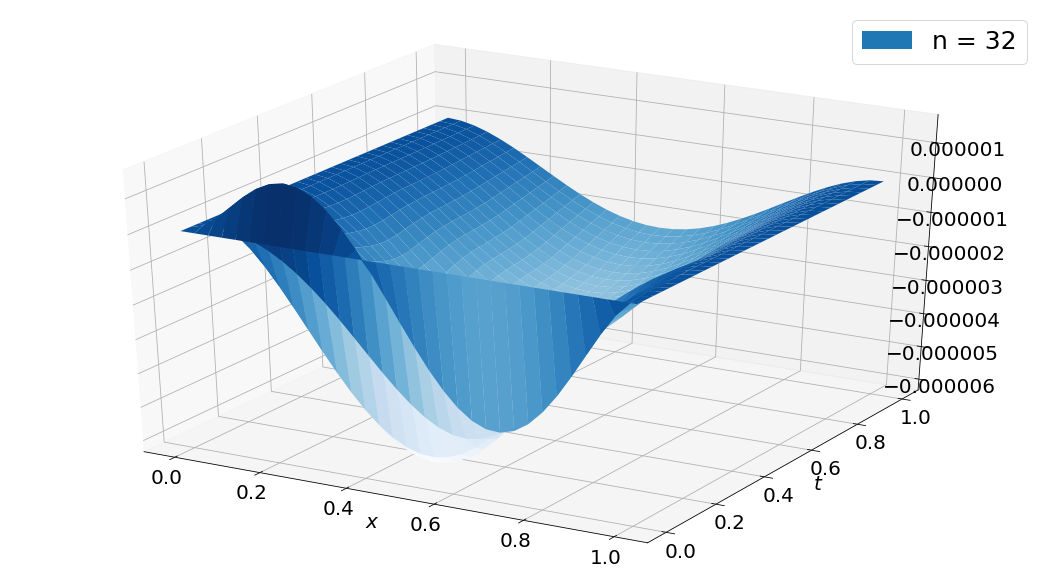

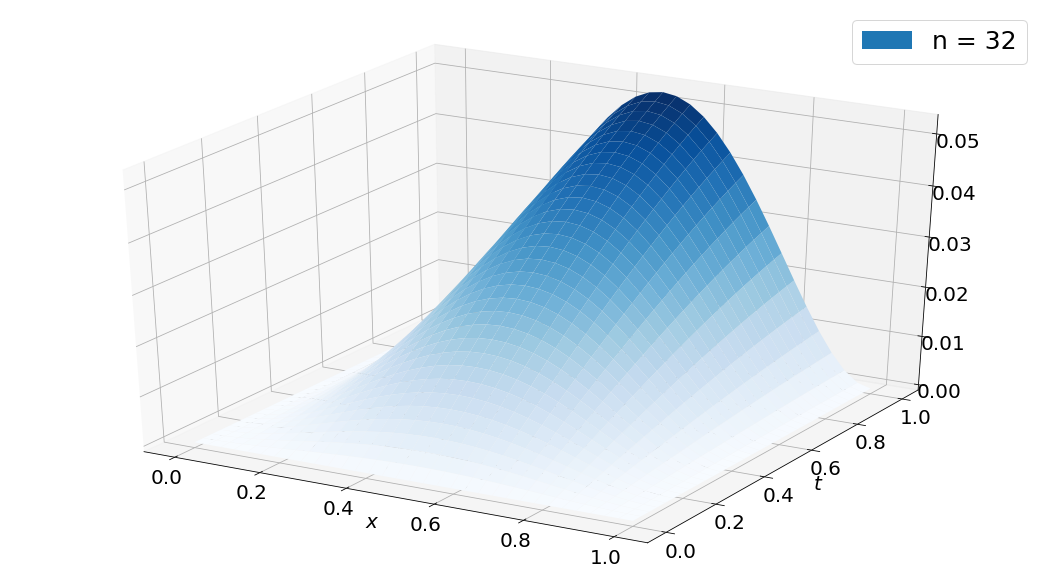

64


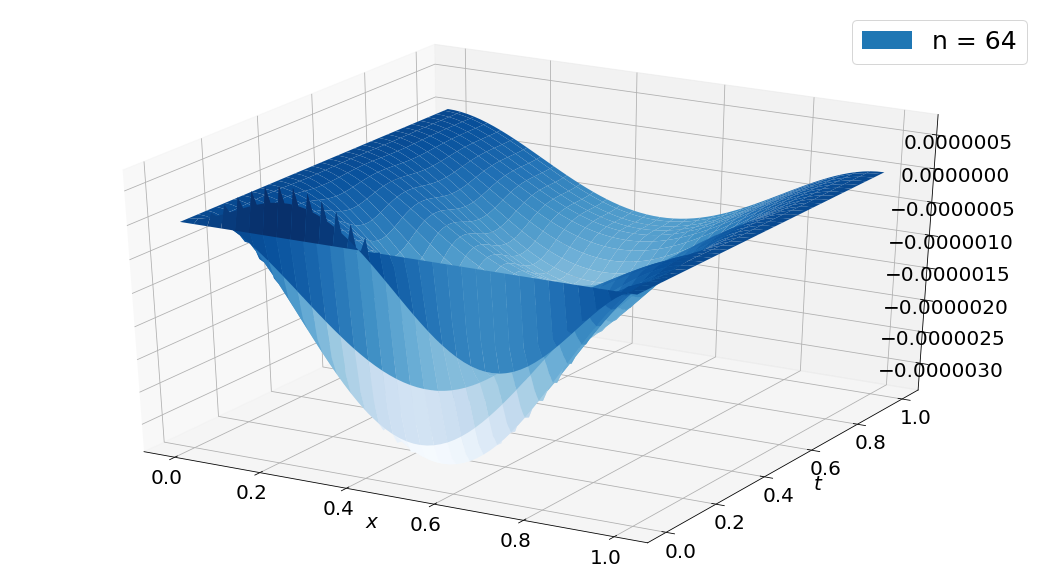

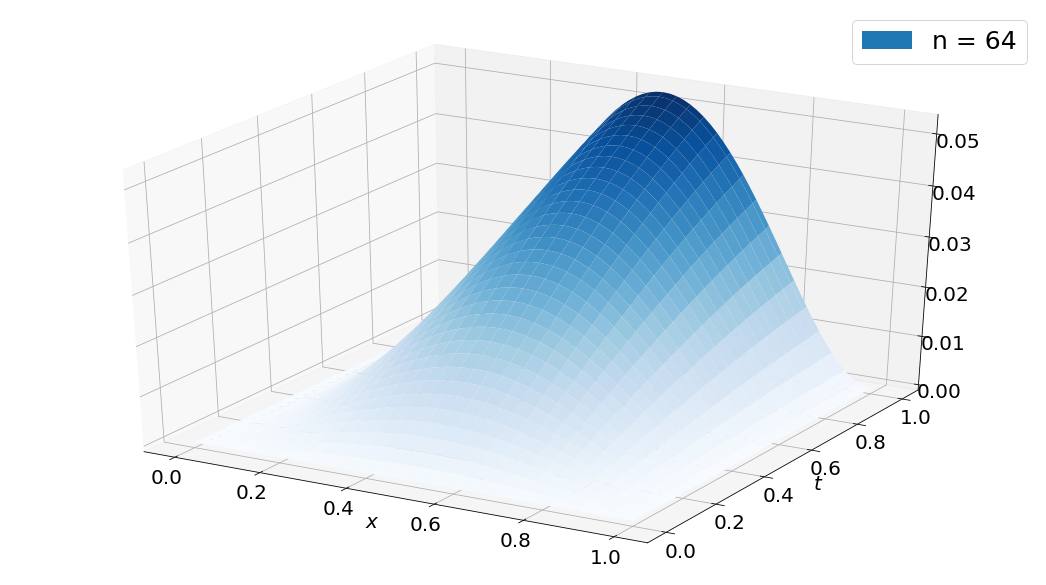

128


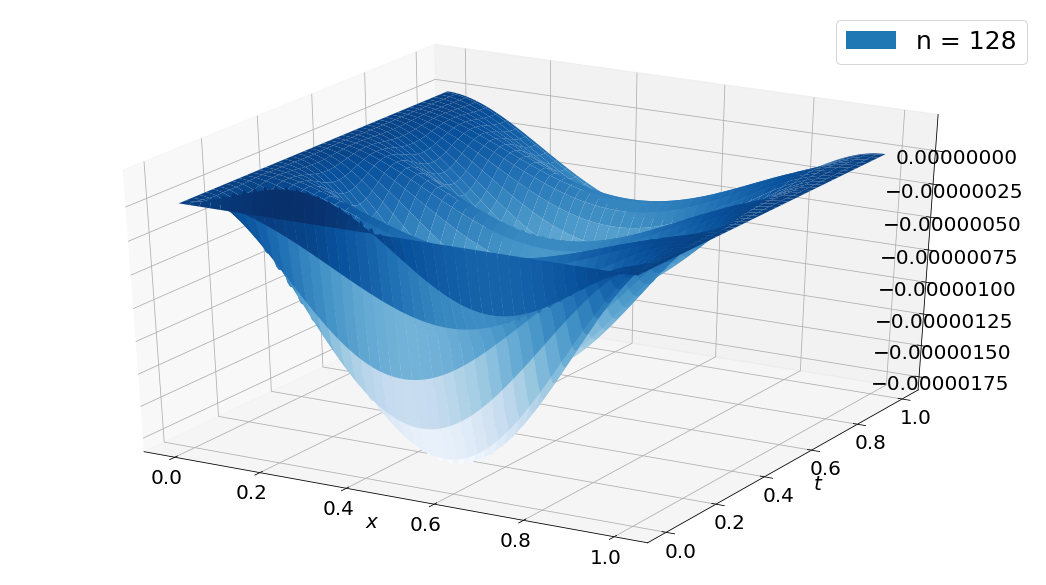

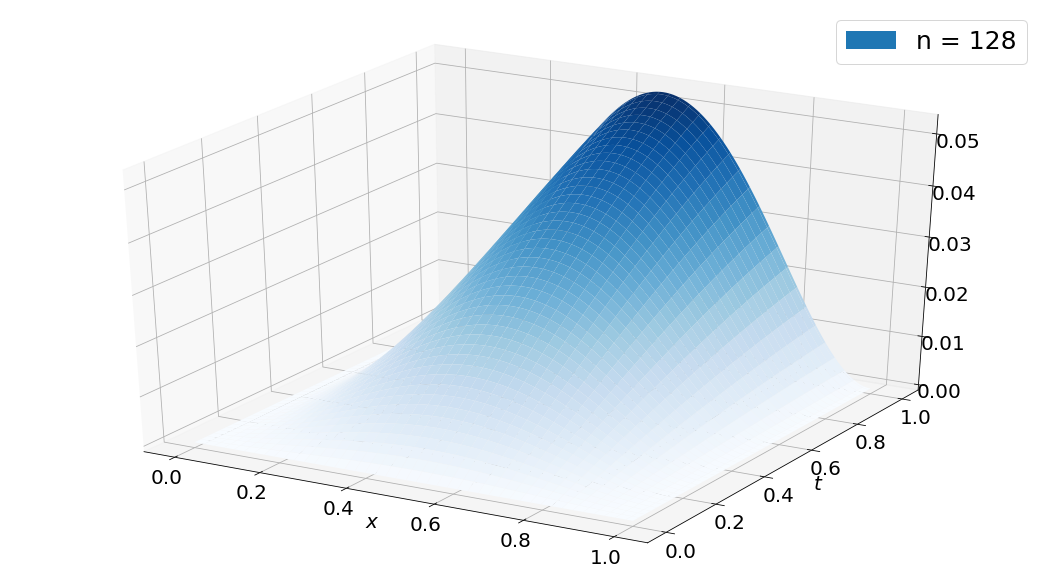

256


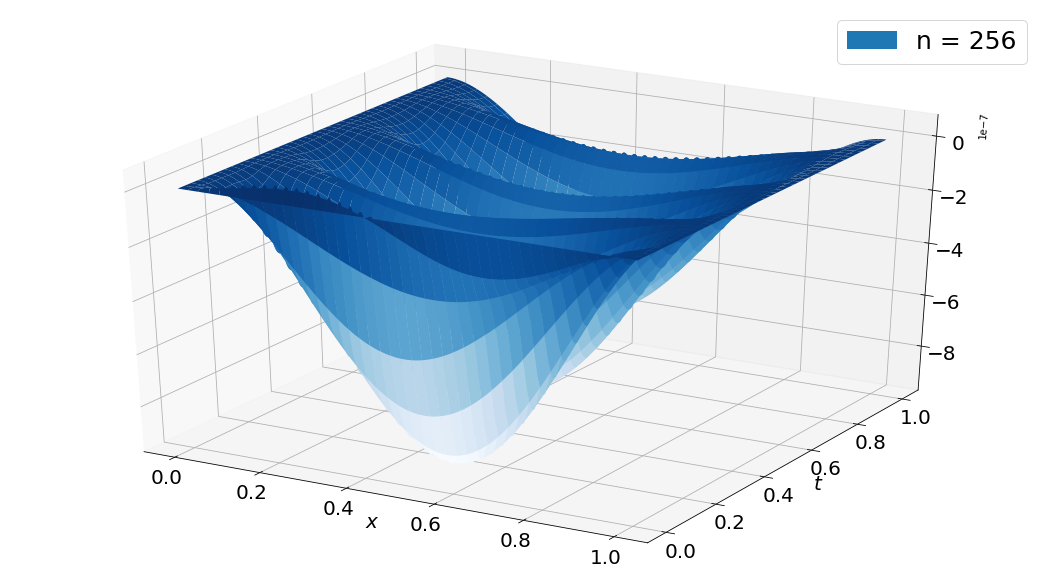

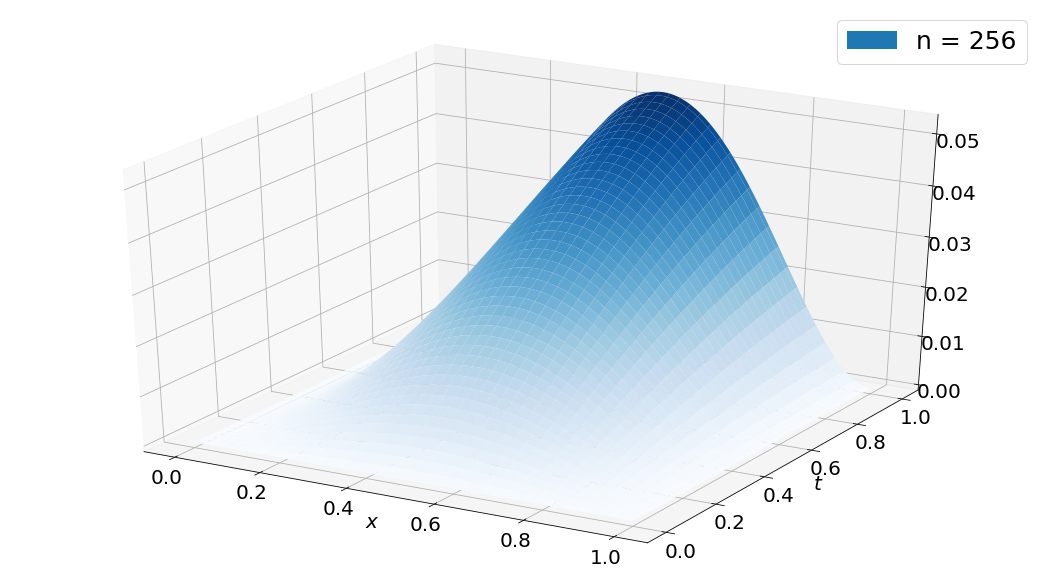

In [25]:
for n,solution in zip(ns,solutions):
    h=L/n
    xx = np.linspace(0,L,n+1)
    m = n
    tt = np.linspace(0,Lt, m)
    dt= Lt/(m-1)
    print(n)
    plot5(solution, usol, label = 'n = ' + str(n))
    plt.savefig("plots/regular/error" + str(n) + ".png", bbox_inches = 'tight')
    plt.show()
    plot4(solution, label = 'n = '+str(n))
    plt.savefig("plots/regular/solution" + str(n) + ".png", bbox_inches = 'tight')
    plt.show()

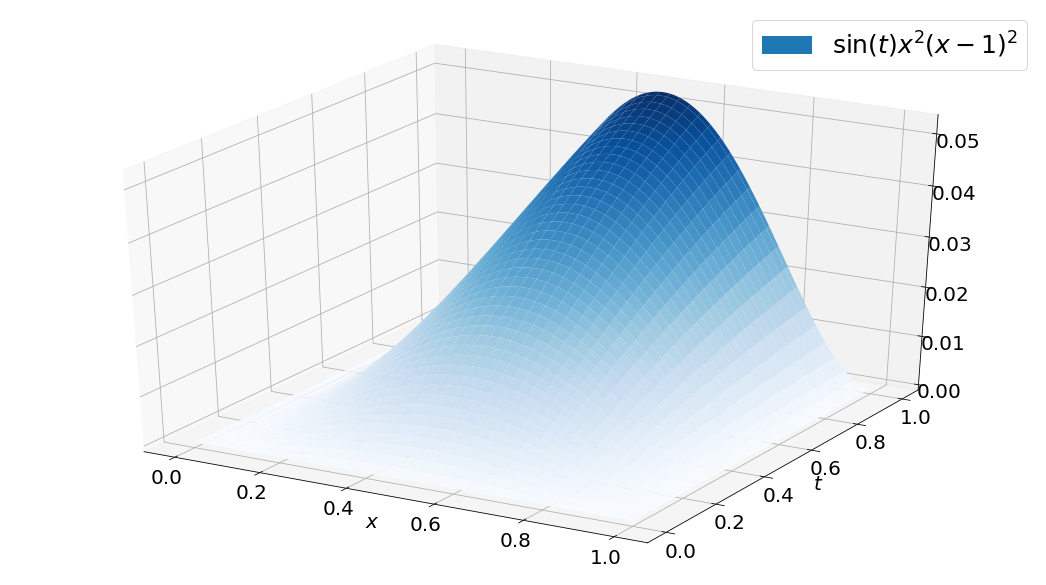

In [37]:
#plot exact solution
X,Y = np.meshgrid(xx,tt)
U = np.zeros((m, n+1))
for j in range(m):
    U[j,:] = [usol(xi, tt[j]) for xi in xx]
fig = plt.figure(figsize=(18.5,10.5))
ax = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('Blues')

# Plot a 3D surface
ax.view_init(30, -60)
surf = ax.plot_surface(X, Y, U, cmap = mycmap, label = '$\sin(t)x^2(x-1)^2$')
surf._facecolors2d = surf._facecolors3d
surf._edgecolors2d = surf._edgecolors3d
ax.legend(prop={'size':25})
ax.set_xlabel('$x$', size=20)
ax.set_ylabel('$t$', size = 20)
plt.xticks(size=20)
plt.yticks(size=20)
ax.zaxis.set_tick_params(labelsize = 20)
plt.savefig("plots/regular/solutionExact.png",bbox_inches='tight')

In [38]:
errors = []
for n,solution in zip(ns, solutions):
    h=L/n
    xx = np.linspace(0,L,n+1)
    m = n
    tt = np.linspace(0,Lt, m)
    dt= Lt/(m-1)
    errors.append(errorLinftyL2(solution, usol))

In [ ]:
#label = '$L^\infty([0,T], H^1(0,1))$ error'
#label = '$L^\infty([0,T], H^2(0,1))$ error'
#label = '$W$ error'
label = '$L^\infty([0,T], L^2(0,1))$ error'
fig = plt.figure(figsize =(18.5,10.5))
plt.scatter([math.log(N,2) for N in ns], [math.log(err,2) for err in errors])
plt.plot([math.log(N,2) for N in ns], [math.log(err,2) for err in errors], label = label)
plt.xlabel('$\log_2(n)$', size = 20)
plt.ylabel('$\log_2(error)$', size = 20)
plt.legend(prop = {'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("plots/regular/errorlogplotL2.png", bbox_inches = 'tight')

In [41]:
errors = []
for n,solution in zip(ns, solutions):
    h=L/n
    xx = np.linspace(0,L,n+1)
    m = n
    tt = np.linspace(0,Lt, m)
    dt= Lt/(m-1)
    errors.append(errorLinftyH1(solution, usol, usolA))

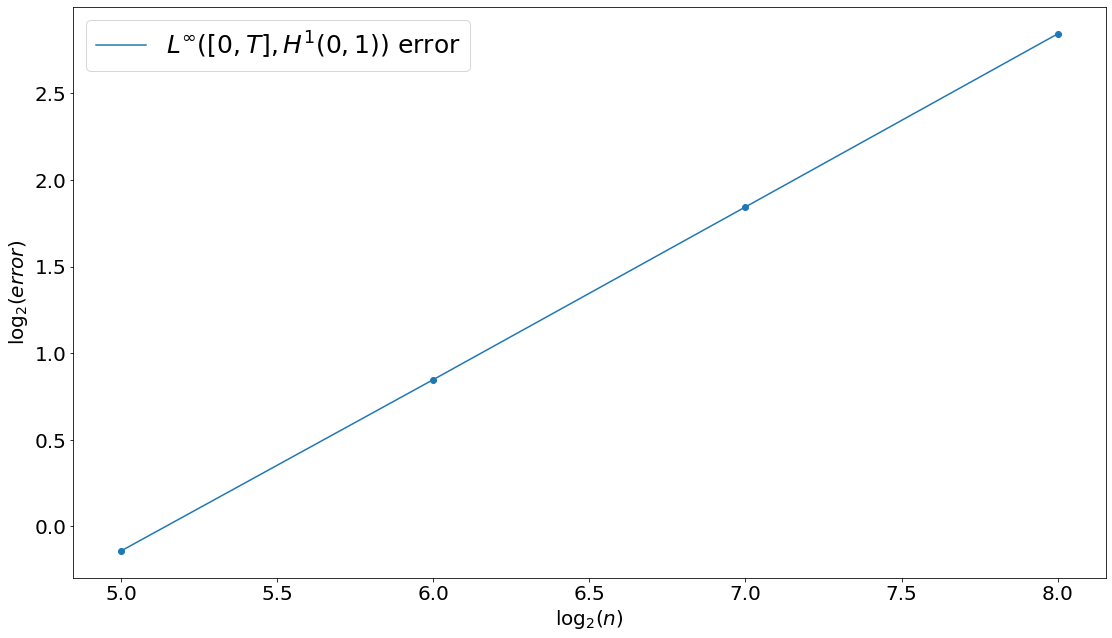

In [42]:
label = '$L^\infty([0,T], H^1(0,1))$ error'
#label = '$L^\infty([0,T], H^2(0,1))$ error'
#label = '$W$ error'
#label = '$L^\infty([0,T], L^2(0,1))$ error'
fig = plt.figure(figsize =(18.5,10.5))
plt.scatter([math.log(N,2) for N in ns], [math.log(err,2) for err in errors])
plt.plot([math.log(N,2) for N in ns], [math.log(err,2) for err in errors], label = label)
plt.xlabel('$\log_2(n)$', size = 20)
plt.ylabel('$\log_2(error)$', size = 20)
plt.legend(prop = {'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("plots/regular/errorlogplotH1.png", bbox_inches = 'tight')

In [ ]:
#To improve the numerical results (and thus error from exact solution), 
#we assume that u_sol(x,h_t) is given instead of the initial velocity.
def f1(x):
    return 0
def f1A(x):
    return 0
#ignored
def f2(x):
    return x**2*(x-1)**2
def f2A(x):
    return 12*x**2 - 12*x + 2


def g(x,t):
    return math.sin(t)*(24-x**2*(x-1)**2 +12*x**2-12*x+2)
def G(t):
    return constructG(g,t)
def b(x,t):
    return 1
def B(t):
    return BMatrix
def c(x):
    return 1


L = 1.0
Lt = 1
limit = 1000
ns = [32,64,128,256]
solutions = []
for n in ns:
    h=L/n
    xx = np.linspace(0,L,n+1)
    m = n
    tt = np.linspace(0,Lt, m)
    dt= Lt/(m-1)

    A = constructA()
    C = constructC(c)
    BMatrix = constructB(b,0)
    
    u = np.zeros((2*n+2, m))
    u[:,0] = HermiteCoef(f1, f1A)
    u[:,1] = HermiteCoef(lambda x:usol(x,dt),lambda x:usolA(x,dt))
    for j in range(2,m):
        t_j = j*dt
        rhs =  dt**2 * G(t_j) + np.dot(A, 2*u[:,j-1] - u[:,j-2])
        massMatrix = A + dt**2 * (B(t_j) + C)
        massMatrix[0,0] = 1
        massMatrix[n,n] = 1
        massMatrix[n+1,n+1] = 1
        massMatrix[2*n+1,2*n+1] = 1
        u[:,j] = np.linalg.solve(massMatrix, rhs)
    solutions.append(u.copy())

In [ ]:
for n,solution in zip(ns,solutions):
    h=L/n
    xx = np.linspace(0,L,n+1)
    m = n
    tt = np.linspace(0,Lt, m)
    dt= Lt/(m-1)
    print(n)
    plot5(solution, usol, label = 'n = ' + str(n))
    plt.savefig("plots/regular/errorNoIV" + str(n) + ".png")
    plt.show()
    plot4(solution, label = 'n = '+str(n))
    plt.savefig("plots/regular/solutionNoIV" + str(n) + ".png", bbox_inches = 'tight')
    plt.show()

In [ ]:
errors = []
for n,solution in zip(ns, solutions):
    h=L/n
    xx = np.linspace(0,L,n+1)
    m = n
    tt = np.linspace(0,Lt, m)
    dt= Lt/(m-1)
    errors.append(errorLinftyL2(solution, usol))

In [ ]:
#label = '$L^\infty([0,T], H^1(0,1))$ error'
#label = '$L^\infty([0,T], H^2(0,1))$ error'
#label = '$W$ error'
label = '$L^\infty([0,T], L^2(0,1))$ error'
fig = plt.figure(figsize = (18.5,10.5))
plt.scatter([math.log(N,2) for N in ns], [math.log(err,2) for err in errors])
plt.plot([math.log(N,2) for N in ns], [math.log(err,2) for err in errors], label = label)
plt.xlabel('$\log_2(n)$', size = 20)
plt.ylabel('$\log_2(error)$',size = 20)
plt.legend(prop = {'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("plots/regular/errorlogplotL2NoIV.png",bbox_inches = 'tight' )
plt.legend()

In [ ]:
errors = []
for n,solution in zip(ns, solutions):
    h=L/n
    xx = np.linspace(0,L,n+1)
    m = n
    tt = np.linspace(0,Lt, m)
    dt= Lt/(m-1)
    errors.append(errorLinftyH1(solution, usol, usolA))

In [ ]:
label = '$L^\infty([0,T], H^1(0,1))$ error'
fig = plt.figure(figsize = (18.5,10.5))
plt.scatter([math.log(N,2) for N in ns], [math.log(err,2) for err in errors])
plt.plot([math.log(N,2) for N in ns], [math.log(err,2) for err in errors], label = label)
plt.xlabel('$\log_2(n)$', size = 20)
plt.ylabel('$\log_2(error)$',size = 20)
plt.legend(prop = {'size':25})
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("plots/regular/errorlogplotH1NoIV.png",bbox_inches = 'tight' )
plt.legend()